# Analysis examples for DANRA reanalysis in zarr storage format

*Updated: 2024-01-12, Leif Denby (lcd@dmi.dk)*

This notebook demonstrates how to analyse the DANRA reanalysis data in zarr. The full DANRA data-collection is grouped in three parts, with data on: 1) height-levels, 2) pressure-levels and 3) single-levels (e.g. Earth's surface, top-of-atmosphere, column-integral properties)

In [1]:
from pathlib import Path
import xarray as xr

version = "v0.2.2"
# fp_root = Path(f"/dmidata/projects/cloudphysics/danra/data/{version}")
fp_root = Path(f"/nwp/danra/data/{version}")

In [2]:
# we'll start by rendering the content of the README.md file inline here
import IPython.display as display

fp_readme = fp_root / "README.md"
with open(fp_readme, "r") as f:
    readme = f.read()
display.display(display.Markdown(readme))

# DANRA reanalysis Zarr data collection

**v0.2.2, created 2024-01-17T15:49:35**

time-span: 1990-09-01 to 1990-10-01

> All variables for one-year period on reduced levels

## single levels

filename: `single_levels.zarr`

<abbr title='CAPE out of the model'>cape_column</abbr>, <abbr title='Cloud base'>cb_column</abbr>, <abbr title='Cloud top'>ct_column</abbr>, <abbr title='Graupel'>grpl_column</abbr>, <abbr title='High cloud cover'>hcc0m</abbr>, <abbr title='Icing index'>icei0m</abbr>, <abbr title='Low cloud cover'>lcc0m</abbr>, <abbr title='Long-wave radiation flux'>lwavr0m</abbr>, <abbr title='Medium cloud cover'>mcc0m</abbr>, <abbr title='Mixed layer depth'>mld0m</abbr>, <abbr title='Net long-wave radiation flux (atmosph.top)'>nlwrt_toa</abbr>, <abbr title='Net short-wave radiation flux (atmosph.top)'>nswrt_toa</abbr>, <abbr title='Pressure'>pres0m</abbr>, <abbr title='Pressure'>pres_seasurface</abbr>, <abbr title='Precipitation Type'>prtp0m</abbr>, <abbr title='Pseudo satellite image: cloud top temperature (infrared)'>psct0m</abbr>, <abbr title='Pseudo satellite image: cloud water reflectivity (visible)'>pscw0m</abbr>, <abbr title='Pseudo satellite image: water vapour Tb'>pstb0m</abbr>, <abbr title='Pseudo satellite image: water vapour Tb + correction for clouds'>pstbc0m</abbr>, <abbr title='Precipitable water'>pwat_column</abbr>, <abbr title='Water equivalent of accumulated snow depth'>sf0m</abbr>, <abbr title='Short-wave radiation flux'>swavr0m</abbr>, <abbr title='Temperature'>t0m</abbr>, <abbr title='Visibility'>vis0m</abbr>, <abbr title='AROME hail diagnostic'>xhail0m</abbr>, <abbr title='Relative humidity'>r2m</abbr>, <abbr title='Temperature'>t2m</abbr>, <abbr title='u-component of wind'>u10m</abbr>, <abbr title='v-component of wind'>v10m</abbr>

<pre>
INSTALLED VERSIONS
------------------
commit: 9278289bb704137a186eb5272735c962ce21b93e
python: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:40:32) [GCC 12.3.0]
python-bits: 64
OS: Linux
OS-release: 5.15.0-91-generic
machine: x86_64
hostname: ohm.dmi.dk
processor: x86_64
byteorder: little
LC_ALL: None
LANG: C.UTF-8
LOCALE: ('en_US', 'UTF-8')
libhdf5: 1.12.2
libnetcdf: 4.9.3-development

kerchunker: None
luigi: 3.4.0
dmidc: 0.4.1
xarray: 2023.12.0
pandas: 2.1.4
numpy: 1.26.2
scipy: 1.11.4
bottleneck: None
dask: 2023.12.0
distributed: None
fsspec: 2023.12.2
numba: 0.58.1
setuptools: 69.0.2
pip: 23.3.2
conda: None
pytest: None
mypy: None
IPython: 8.18.1
sphinx: None
</pre>



In [4]:
ds_sl = xr.open_zarr(fp_root / "single_levels.zarr")
ds_sl

<xarray.Dataset>
Dimensions:            (time: 225, y: 589, x: 789)
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
    lon                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-01 ... 1990-09-29
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables: (12/29)
    cape_column        (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    cb_column          (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    ct_column          (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    grpl_column        (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    hcc0m              (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    icei0m             (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    ...                 ...
    t0m                (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    t2m                (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    u10m               (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    v10m               (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    vis0m              (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
    xhail0m            (time, y, x) float64 dask.array<chunksize=(24, 512, 512), meta=np.ndarray>
Attributes:
    description:  All variables for one-year period on reduced levels

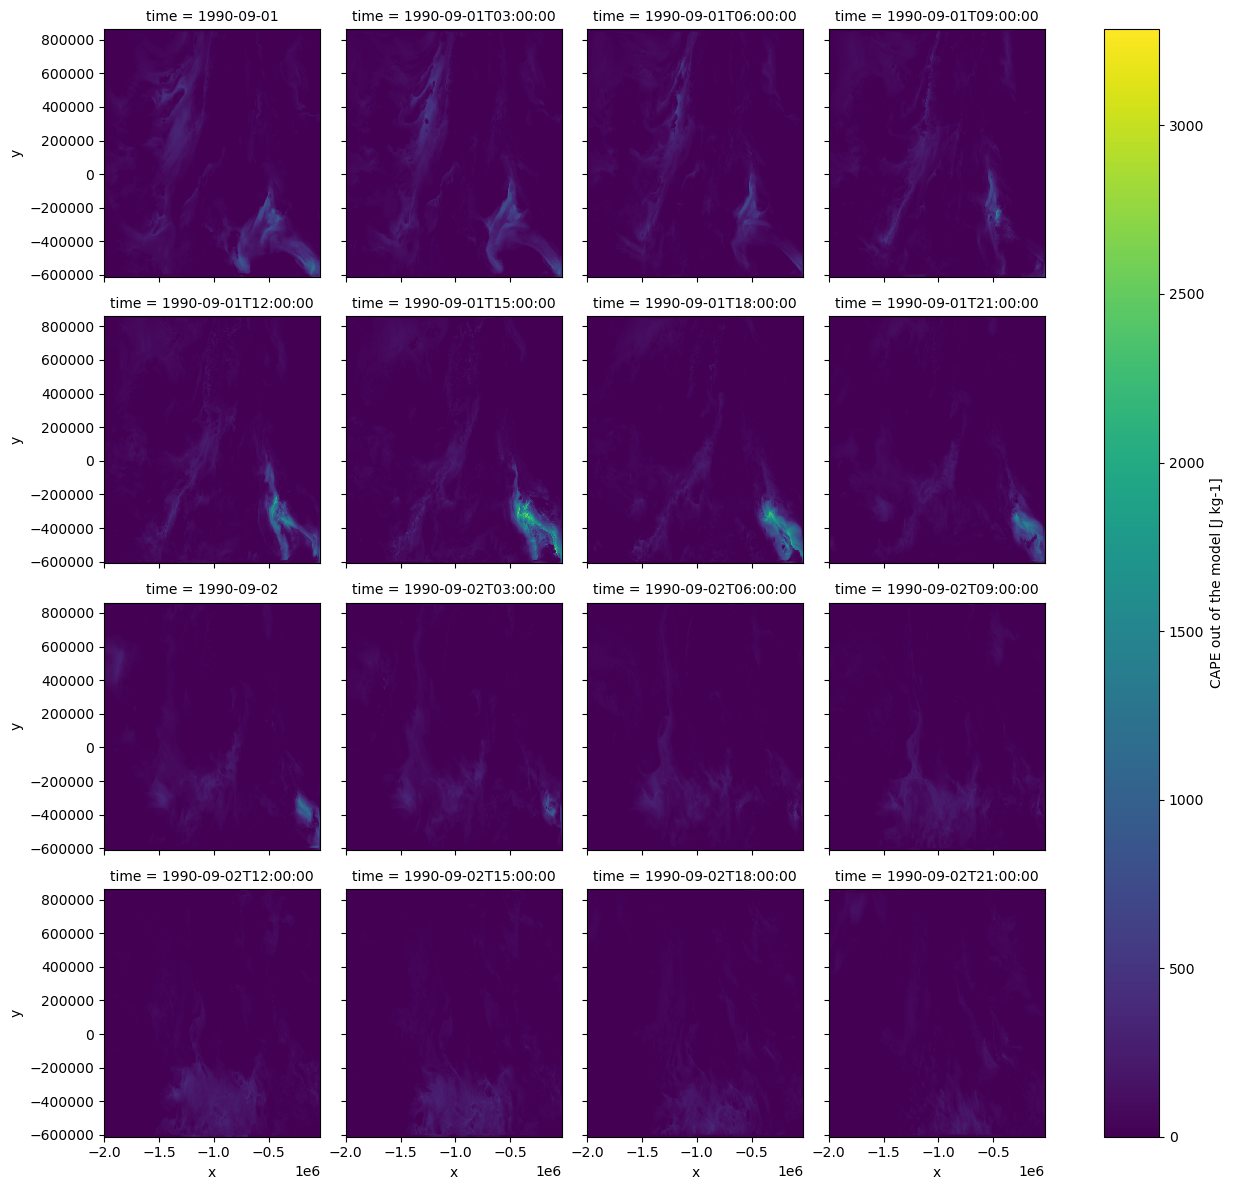

In [6]:
ds_sl.isel(time=slice(0, 16)).cape_column.plot(col="time", col_wrap=4)

# Looking at pressure-level data

In [7]:
ds_pl = xr.open_zarr(fp_root / "pressure_levels.zarr")
ds_pl

<xarray.Dataset>
Dimensions:            (level: 1, time: 225, y: 589, x: 789)
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
  * level              (level) int64 1000
    lon                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-01 ... 1990-09-29
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Data variables:
    ciwc               (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    cwat               (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    r                  (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    t                  (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    tw                 (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    u                  (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    v                  (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
    z                  (level, time, y, x) float64 dask.array<chunksize=(1, 24, 512, 512), meta=np.ndarray>
Attributes:
    description:  All variables for one-year period on reduced levels

In [8]:
# selecting a variable and a time-subset
da_t = ds_pl.t.sel(time=slice("1990-09-15T06:00:00", "1990-09-15T16:00:00"))

da_t

<xarray.DataArray 't' (level: 1, time: 4, y: 589, x: 789)>
dask.array<getitem, shape=(1, 4, 589, 789), dtype=float64, chunksize=(1, 4, 512, 512), chunktype=numpy.ndarray>
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
  * level              (level) int64 1000
    lon                (y, x) float64 dask.array<chunksize=(512, 512), meta=np.ndarray>
  * time               (time) datetime64[ns] 1990-09-15T06:00:00 ... 1990-09-...
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Attributes:
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  isobaricInhPa
    units:        K

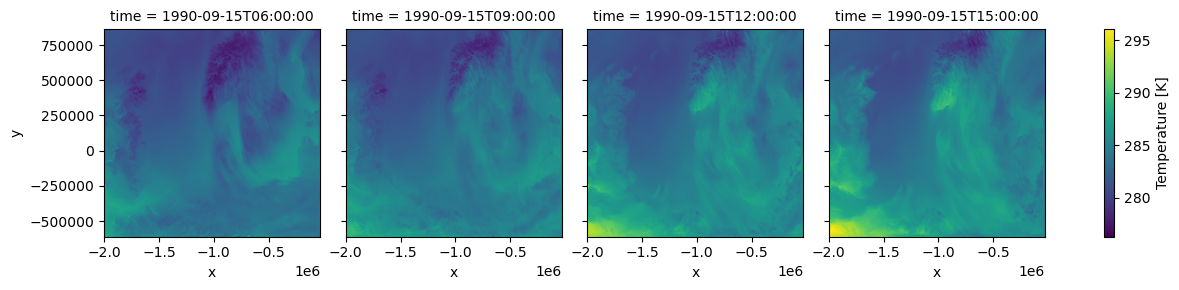

In [9]:
da_t.plot(col="time", col_wrap=4)

In [5]:
ds_pl[["time"]].chunk(dict(time=100))

<xarray.Dataset>
Dimensions:            (time: 2932)
Coordinates:
  * time               (time) datetime64[ns] 1990-09-01 ... 1991-08-27
    forecast_duration  float64 ...
Data variables:
    *empty*
Attributes:
    description:  All variables for one-year period on reduced levels

In [6]:
import dask

In [42]:
da_time = ds_pl["time"]
da_time.chunk(chunks=10, inline_array=True)

<xarray.DataArray 'time' (time: 2932)>
array(['1990-09-01T00:00:00.000000000', '1990-09-01T03:00:00.000000000',
       '1990-09-01T06:00:00.000000000', ..., '1991-08-26T18:00:00.000000000',
       '1991-08-26T21:00:00.000000000', '1991-08-27T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
    forecast_duration  float64 ...
  * time               (time) datetime64[ns] 1990-09-01 ... 1991-08-27

In [48]:
xr.DataArray(da_time.data, coords=dict(time=da_time.data)).chunk(chunks=10)

<xarray.DataArray (time: 2932)>
dask.array<xarray-<this-array>, shape=(2932,), dtype=datetime64[ns], chunksize=(10,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1990-09-01 1990-09-01T03:00:00 ... 1991-08-27

In [27]:
ds_pl.time.chunk(dict(time=500)).drop(["forecast_duration"]).to_zarr("test.zarr", consolidated=True)

In [22]:
da2.close()

In [26]:
da2 = xr.open_zarr("test.zarr")
da2.__xarray_dataarray_variable__.to_index().is_unique

False

In [5]:
da_t.plot(col="time", col_wrap=4)

ValueError: Coordinates used for faceting cannot contain repeated (nonunique) values.

In [21]:
%debug

> /home/lcd/git-repos/danra_to_zarr/.venv/lib/python3.10/site-packages/xarray/plot/facetgrid.py(174)__init__()
    172         rep_row = row is not None and not data[row].to_index().is_unique
    173         if rep_col or rep_row:
--> 174             raise ValueError(
    175                 "Coordinates used for faceting cannot "
    176                 "contain repeated (nonunique) values."

<xarray.DataArray 't' (time: 4, y: 589, x: 789)>
array([[[288.17700195, 288.25146484, 288.26489258, ..., 283.68139648,
         283.68725586, 283.73510742],
        [288.24755859, 288.3034668 , 288.30273438, ..., 283.7578125 ,
         283.76196289, 283.81005859],
        [288.23681641, 288.28198242, 288.26953125, ..., 283.79223633,
         283.7956543 , 283.84423828],
        ...,
        [281.44726562, 281.4609375 , 281.45874023, ..., 279.78540039,
         279.74389648, 279.73071289],
        [281.49145508, 281.5012207 , 281.49682617, ..., 279.79907227,
         279.7565918 , 279.74438477],
 

In [20]:
import pandas as pd
pd.DatetimeIndex(['1990-09-15 06:00:00', '1990-09-15 09:00:00',
               '1990-09-15 12:00:00', '1990-09-15 15:00:00'], name='time', freq=None).is_unique

True

In [25]:
da_t["time"].to_index()

DatetimeIndex(['1990-09-15 06:00:00', '1990-09-15 09:00:00',
               '1990-09-15 12:00:00', '1990-09-15 15:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)

In [29]:
import numpy as np

In [40]:
idx2 = pd.DatetimeIndex(da_t["time"].values)
idx2.is_unique

True

In [50]:
idx = da_t["time"].to_index()
len(idx), idx.nunique(), idx.nunique(dropna=False), idx.is_unique

(4, 4, 4, False)

In [63]:
da_t["time"].variable.to_index

<bound method IndexVariable.to_index of <xarray.IndexVariable 'time' (time: 4)>
array(['1990-09-15T06:00:00.000000000', '1990-09-15T09:00:00.000000000',
       '1990-09-15T12:00:00.000000000', '1990-09-15T15:00:00.000000000'],
      dtype='datetime64[ns]')>

In [84]:
idx._attrs

AttributeError: 'DatetimeIndex' object has no attribute '_attrs'

In [64]:
idv = da_t["time"].variable


In [72]:
idxv = idv.to_index_variable()

In [88]:
da_t

<xarray.DataArray 't' (level: 1, time: 4, y: 589, x: 789)>
[1858884 values with dtype=float64]
Coordinates:
    forecast_duration  float64 ...
    lat                (y, x) float64 ...
  * level              (level) int64 1000
    lon                (y, x) float64 ...
  * time               (time) datetime64[ns] 1990-09-15T06:00:00 ... 1990-09-...
  * x                  (x) float64 -1.999e+06 -1.997e+06 ... -2.925e+04
  * y                  (y) float64 -6.095e+05 -6.07e+05 ... 8.58e+05 8.605e+05
Attributes:
    long_name:    Temperature
    shortName:    t
    stepType:     instant
    stepUnits:    1
    typeOfLevel:  isobaricInhPa
    units:        K

In [89]:
da_t.to_netcdf("test.nc")

In [94]:
da_t["time"].to_index().is_unique

False

In [90]:
da2 = xr.open_dataset("test.nc")
da2["time"].to_index().is_unique

True

In [73]:
idxv??

Type:           IndexVariable
String form:   
<xarray.IndexVariable 'time' (time: 4)>
array(['1990-09-15T06:00:00.000000000', '1990-09-15T09:00:00.000000000',
       '1990-09-15T12:00:00.000000000', '1990-09-15T15:00:00.000000000'],
      dtype='datetime64[ns]')
Length:         4
File:           ~/git-repos/danra_to_zarr/.venv/lib/python3.10/site-packages/xarray/core/variable.py
Source:        
class IndexVariable(Variable):
    """Wrapper for accommodating a pandas.Index in an xarray.Variable.

    IndexVariable preserve loaded values in the form of a pandas.Index instead
    of a NumPy array. Hence, their values are immutable and must always be one-
    dimensional.

    They also have a name property, which is the name of their sole dimension
    unless another name is given.
    """

    __slots__ = ()

    # TODO: PandasIndexingAdapter doesn't match the array api:
    _data: PandasIndexingAdapter  # type: ignore[assignment]

    def __init__(self, dims, data, attrs=None, encoding=

In [82]:
idxv

<xarray.IndexVariable 'time' (time: 4)>
array(['1990-09-15T06:00:00.000000000', '1990-09-15T09:00:00.000000000',
       '1990-09-15T12:00:00.000000000', '1990-09-15T15:00:00.000000000'],
      dtype='datetime64[ns]')

In [55]:
pd.DatetimeIndex(idx.to_numpy()).is_unique

True

In [42]:
idx- idx2

TimedeltaIndex(['0 days', '0 days', '0 days', '0 days'], dtype='timedelta64[ns]', freq=None)

In [43]:
idx??

Type:        DatetimeIndex
String form:
DatetimeIndex(['1990-09-15 06:00:00', '1990-09-15 09:00:00',
               '1990-09-15 12:00:00', '1990-09-15 15:00:00'],
              dtype='datetime64[ns]', name='time', freq=None)
Length:      4
File:        ~/git-repos/danra_to_zarr/.venv/lib/python3.10/site-packages/pandas/core/indexes/datetimes.py
Source:     
@inherit_names(
    DatetimeArray._field_ops
    + [
        method
        for method in DatetimeArray._datetimelike_methods
        if method not in ("tz_localize", "tz_convert", "strftime")
    ],
    DatetimeArray,
    wrap=True,
)
@inherit_names(["is_normalized"], DatetimeArray, cache=True)
@inherit_names(
    [
        "tz",
        "tzinfo",
        "dtype",
        "to_pydatetime",
        "_format_native_types",
        "date",
        "time",
        "timetz",
        "std",
    ]
    + DatetimeArray._bool_ops,
    DatetimeArray,
)
class DatetimeIndex(DatetimeTimedeltaMixin):
    """
    Immutable ndarray-like of datetime6